In [1]:
import pandas as pd

In [4]:
data_dir = "/mnt/D1/caris_exosome/probing_vcap_lncap/"

In [16]:
l1 = pd.read_csv(data_dir+"lncap1.csv", header=None, delimiter=" ")
l1.columns = ["copy_num", "sequence", "c1", "c2", "c3", "c4","c5"]
l1 = l1.iloc[:, :2]

In [58]:
def import_csv(csv_file):
    df = pd.read_csv(csv_file, header=None, delimiter=" ")
    df.columns = ["copy_num", "sequence", "c1", "c2", "c3", "c4","c5"]
    df= df.iloc[:, :2]
    df.drop_duplicates("sequence", inplace=True)
    return df

In [17]:
l1.head()

,copy_num,sequence
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA


In [59]:
l1 = import_csv(data_dir+"lncap1.csv")
l2 = import_csv(data_dir+"lncap2.csv")
v1 = import_csv(data_dir+"vcap1.csv")
v2 = import_csv(data_dir+"vcap2.csv")

In [24]:
v2.head()

,copy_num,sequence
0,3063787,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA
1,2180058,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT
2,1259816,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA
3,497516,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA
4,228201,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA


In [60]:
l_merged = pd.merge(l1, l2, how='inner', left_on='sequence', right_on='sequence')
l_merged.columns = ["copy_num_l1", "sequence", "copy_num_l2"]
l_merged.head()

,copy_num_l1,sequence,copy_num_l2
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932


In [61]:
print(l1.index.__len__(), l2.index.__len__(), l_merged.index.__len__())

138014 145618 79137


In [62]:
v_merged = pd.merge(v1, v2, how='inner', left_on='sequence', right_on='sequence')
v_merged.columns = ["copy_num_v1", "sequence", "copy_num_v2"]
v_merged.head()

,copy_num_v1,sequence,copy_num_v2
0,2563471,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3063787
1,1769898,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2180058
2,967257,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1259816
3,419939,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,497516
4,200728,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA,228201


In [63]:
print(v1.index.__len__(), v2.index.__len__(), v_merged.index.__len__())

107171 118334 61964


In [64]:
all_merged = pd.merge(l_merged, v_merged, how='inner', left_on='sequence', right_on='sequence')
all_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849,2563471,3063787
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995,1769898,2180058
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223,967257,1259816
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369,419939,497516
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932,53760,65811


In [65]:
print(all_merged.index.__len__())

50172


In [37]:
vfull = pd.merge(v1, v2, how='outer', left_on='sequence', right_on='sequence')
vfull.columns = ["copy_num_v1", "sequence", "copy_num_v2"]
print(vfull.index.__len__())

163541


In [38]:
vfull.head()

,copy_num_v1,sequence,copy_num_v2
0,2563471.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3063787.0
1,1769898.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2180058.0
2,967257.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1259816.0
3,419939.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,497516.0
4,200728.0,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA,228201.0


In [39]:
lfull = pd.merge(l1, l2, how='outer', left_on='sequence', right_on='sequence')
lfull.columns = ["copy_num_l1", "sequence", "copy_num_l2"]
print(lfull.index.__len__())

204495


In [40]:
lfull.head()

,copy_num_l1,sequence,copy_num_l2
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0


In [41]:
full_merged = pd.merge(lfull, vfull, how='inner', left_on='sequence', right_on='sequence')
full_all = pd.merge(lfull, vfull, how='outer', left_on='sequence', right_on='sequence')
print(full_merged.index.__len__(), full_all.index.__len__())
full_merged.head()

97756 270280


,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0,2563471.0,3063787.0
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0,1769898.0,2180058.0
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0,967257.0,1259816.0
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0,419939.0,497516.0
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0,53760.0,65811.0


In [48]:
import numpy as np
full_merged["max_l"] = full_merged.apply(lambda x: np.nanmax(np.asarray([x["copy_num_l1"], x["copy_num_l2"]])), axis=1)
full_merged["max_v"] = full_merged.apply(lambda x: np.nanmax(np.asarray([x["copy_num_v1"], x["copy_num_v2"]])), axis=1)
full_merged["fold_v_over_l"] = full_merged.apply(lambda x: x["max_v"]/x["max_l"], axis=1)

In [49]:
full_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0,2563471.0,3063787.0,3959849.0,3063787.0,0.773713
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0,1769898.0,2180058.0,2262995.0,2180058.0,0.963351
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0,967257.0,1259816.0,1162223.0,1259816.0,1.083971
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0,419939.0,497516.0,427369.0,497516.0,1.164137
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0,53760.0,65811.0,231932.0,65811.0,0.283751


In [51]:
full_merged.sort_values("fold_v_over_l", ascending=False, inplace=True)
full_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l
89334,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA,1.0,38.0,1.0,1.0,38.0,38.000000
81744,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG,6.0,131.0,26.0,6.0,131.0,21.833333
81576,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA,9.0,163.0,163.0,9.0,163.0,18.111111
78869,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT,NaN,17.0,10.0,1.0,17.0,17.000000
72352,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000


In [55]:
from rbm_torch.utils import data_prep as dp

foldv = full_merged["fold_v_over_l"].tolist()

v_enriched = [x for x in foldv if x >= 2]
l_enriched = [x for x in foldv if x <= 0.5]

print("v_enriched", len(v_enriched), "l_enriched", len(l_enriched))

v_enriched 9633 l_enriched 35372


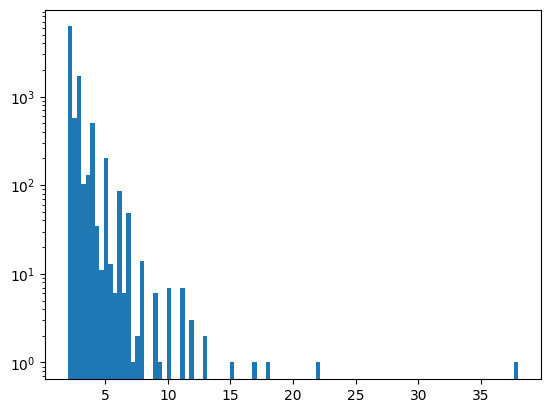

In [56]:
dp.quick_hist(v_enriched)

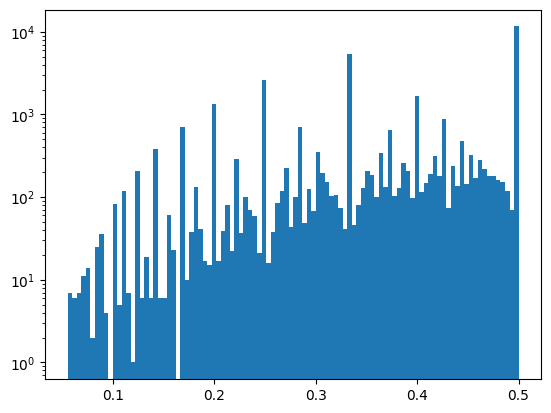

In [57]:
dp.quick_hist(l_enriched)

In [66]:
vleft = vfull.merge(lfull, on=['sequence'], how='left', indicator=True)
lleft = lfull.merge(vfull, on=['sequence'], how='left', indicator=True)

v_only = vleft[vleft["_merge"] == "left_only"]
l_only = lleft[lleft["_merge"] == "left_only"]

In [67]:
v_only.index.__len__()

65785

In [68]:
l_only.index.__len__()

106739

In [69]:
v_only

,copy_num_v1,sequence,copy_num_v2,copy_num_l1,copy_num_l2,_merge
6628,33.0,TGCGCCGAATAAACGGTTTACTTAGCTCTTAGGGGA,NaN,NaN,NaN,left_only
7419,29.0,TGCTAACCTGGTTTTTTTTGGTATGTTTGATGCGC,NaN,NaN,NaN,left_only
8262,25.0,ACATCCTAGCACATGATGAGACTACAACGCGCCTTA,NaN,NaN,NaN,left_only
9083,22.0,TCTTAATAAAACTACATATTCGCCGGTCCAAATCC,NaN,NaN,NaN,left_only
10466,18.0,TCAATTCCCGTTCTCAACTCGCTGTTTATGTGTCG,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...
163536,NaN,GACTCACTGGGGTTTCGTTTTTTGTATCTTTTTTT,1.0,NaN,NaN,left_only
163537,NaN,AACTGACTGGGGTTTCGTTTTTTGTATCTTTTTTT,1.0,NaN,NaN,left_only
163538,NaN,GGTTGTGGGGCGTACGCTTAGTATGGAGTTTTTTT,1.0,NaN,NaN,left_only
163539,NaN,GGTTTTGGGCCGTACGCTTATTATGGAGTTTTTTT,1.0,NaN,NaN,left_only


In [105]:
from copy import copy
vo = copy(v_only)
lo = copy(l_only)


vo.reset_index(drop=True, inplace=True)
lo.reset_index(drop=True, inplace=True)
vo["max_v"] = vo.apply(lambda x: max(x["copy_num_v1"], x["copy_num_v2"]), axis=1)
vo["fold_v_over_l"] = vo["max_v"]
lo["max_l"] = lo.apply(lambda x: max(x["copy_num_l1"], x["copy_num_l2"]), axis=1)
lo["fold_v_over_l"] = lo.apply(lambda x: 1./x["max_l"], axis=1)

In [89]:
vo.head()

,copy_num_v1,sequence,copy_num_v2,copy_num_l1,copy_num_l2,_merge,v_max,max_v
0,33.0,TGCGCCGAATAAACGGTTTACTTAGCTCTTAGGGGA,NaN,NaN,NaN,left_only,33.0,33.0
1,29.0,TGCTAACCTGGTTTTTTTTGGTATGTTTGATGCGC,NaN,NaN,NaN,left_only,29.0,29.0
2,25.0,ACATCCTAGCACATGATGAGACTACAACGCGCCTTA,NaN,NaN,NaN,left_only,25.0,25.0
3,22.0,TCTTAATAAAACTACATATTCGCCGGTCCAAATCC,NaN,NaN,NaN,left_only,22.0,22.0
4,18.0,TCAATTCCCGTTCTCAACTCGCTGTTTATGTGTCG,NaN,NaN,NaN,left_only,18.0,18.0


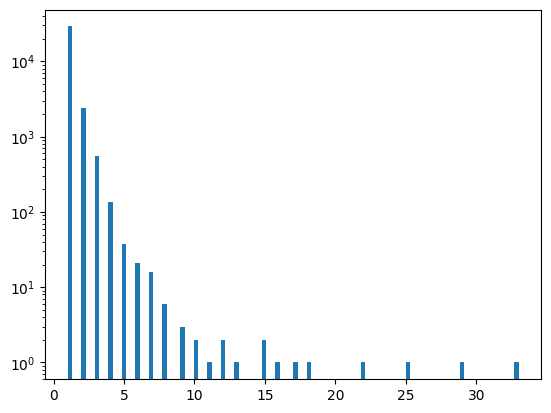

In [75]:
dp.quick_hist(vo["v_max"].tolist())

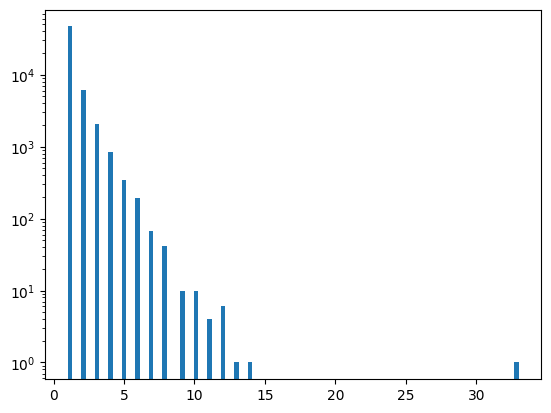

In [76]:
dp.quick_hist(lo["l_max"].tolist())

In [106]:
enrichv = full_merged[(full_merged["max_v"] >= 5) & (full_merged["fold_v_over_l"] >= 1.5)]  # all sequences that enrich v over l at 2x or greater with a copy_num of at least 5 in the v data files and
full_enrichv = pd.concat([enrichv, vo[vo["fold_v_over_l"] >= 5]], join="outer")  # add sequences that
print(enrichv.index.__len__(), full_enrichv.index.__len__())

4157 4256


In [91]:
full_enrichv.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l,_merge,v_max
89334,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA,1.0,38.0,1.0,1.0,38.0,38.000000,NaN,NaN
81744,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG,6.0,131.0,26.0,6.0,131.0,21.833333,NaN,NaN
81576,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA,9.0,163.0,163.0,9.0,163.0,18.111111,NaN,NaN
78869,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT,NaN,17.0,10.0,1.0,17.0,17.000000,NaN,NaN
72352,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000,NaN,NaN


In [110]:
ng_seqs = full_enrichv["sequence"].tolist()
gapped_seqs = dp.gap_adder(ng_seqs, 38, position_indx=-1)
full_enrichv["sequence"] = gapped_seqs

In [111]:
dp.dataframe_to_fasta(full_enrichv, "./exo/pev.fasta", count_key="fold_v_over_l")

In [107]:
full_enrichv["fold_v_over_l"].isnull().values.any()

False

In [96]:
full_enrichv.iloc[0, 0]

nan

In [115]:
enrichl= full_merged[(full_merged["max_l"] >= 5) & (full_merged["fold_v_over_l"] <= 0.5)]  # all sequences that enrich v over l at 2x or greater with a copy_num of at least 5 in the v data files and
full_enrichl = pd.concat([enrichl, lo[lo["fold_v_over_l"] <= 0.2]], join="outer")  # add sequences unobserved in vcap data with copy num of 5 or greater
print(enrichl.index.__len__(), full_enrichl.index.__len__())

20018 20692


In [113]:
full_enrichl["fold_v_over_l"].isnull().values.any()

False

In [116]:
ng_seqs = full_enrichl["sequence"].tolist()
gapped_seqs = dp.gap_adder(ng_seqs, 38, position_indx=-1)
full_enrichl["sequence"] = gapped_seqs

full_enrichl["fold_l_over_v"] = full_enrichl.apply(lambda x: 1./x["fold_v_over_l"], axis=1)

dp.dataframe_to_fasta(full_enrichl, "./exo/pel.fasta", count_key="fold_l_over_v")

In [129]:
### Forgot to remove very alike sequences
### Lets try to do that now
from sklearn.metrics import pairwise_distances
from rbm_torch.utils.seq_utils import seq_to_cat


def prune_sim_seqs(dataframe, hamming_threshold=0, molecule="protein"):
    dataframe.reset_index(drop=True, inplace=True)
    seqs = dataframe["sequence"].tolist()
    index = dataframe.index.tolist()

    cat = seq_to_cat(seqs, molecule=molecule)
    X = cat.numpy().astype(np.int8)

    seq_len = len(seqs[0])
    selected_seqs, selected_indices, selected_cat = [], [], []
    total_seqs = len(seqs)
    for i in range(total_seqs):  # len(m1_seqs)
        if i == 0:
            selected_seqs.append(seqs[i])
            selected_indices.append(index[i])
            selected_cat.append(X[i])
        else:
            # number of mutations this sequence is from all sequences in the selected subset
            dist_matrix = pairwise_distances([X[i]], selected_cat, metric="hamming") * seq_len
            if min(dist_matrix[0]) > hamming_threshold:
                selected_seqs.append(seqs[i])
                selected_indices.append(index[i])
                selected_cat.append(X[i])

    print(f"Kept {len(selected_seqs)} of {total_seqs}")

    dataframe = dataframe.iloc[selected_indices, :]
    # dataframe.head()
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

In [132]:
full_enrichv.sort_values("fold_v_over_l", inplace=True, ascending=False)
enrichv_pruned = prune_sim_seqs(full_enrichv, hamming_threshold=4, molecule="dna")  # remove sequences within 4 mutations of any others
dp.dataframe_to_fasta(enrichv_pruned, "./exo/pevp.fasta", count_key="fold_v_over_l")

Kept 2451 of 4256


In [131]:
enrichv_pruned.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l,_merge,v_max
0,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA--,1.0,38.0,1.0,1.0,38.0,38.000000,NaN,NaN
1,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG---,6.0,131.0,26.0,6.0,131.0,21.833333,NaN,NaN
2,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA-,9.0,163.0,163.0,9.0,163.0,18.111111,NaN,NaN
3,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT---,NaN,17.0,10.0,1.0,17.0,17.000000,NaN,NaN
4,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000,NaN,NaN


In [133]:
full_enrichl.sort_values("fold_l_over_v", inplace=True, ascending=False)
enrichl_pruned = prune_sim_seqs(full_enrichl, hamming_threshold=4, molecule="dna")  # remove sequences within 4 mutations of any others
dp.dataframe_to_fasta(enrichl_pruned, "./exo/pelp.fasta", count_key="fold_l_over_v")

Kept 19172 of 20692
